In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
%matplotlib inline

In [2]:
od.download('https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction')

Skipping, found downloaded files in ".\credit-card-customer-churn-prediction" (use force=True to force download)


In [3]:
os.listdir('credit-card-customer-churn-prediction')

['Churn_Modelling.csv']

In [4]:
df = pd.read_csv('credit-card-customer-churn-prediction/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [9]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [12]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA SKIPPED

In [13]:
df= pd.get_dummies(df, columns=['Geography','Gender'])

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [15]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Exited'])
Y= df.Exited

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [16]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,True,False,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,False,True,False,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,False,True,False,True
6087,561,27,9,135637.00,1,1,0,153080.40,True,False,False,True,False
6669,517,56,9,142147.32,1,0,0,39488.04,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,True,False,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,True,False,False,True,False
5390,735,38,1,0.00,3,0,0,92220.12,True,False,False,True,False
860,667,43,8,190227.46,1,1,0,97508.04,True,False,False,False,True


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [18]:
X_train_scaled

array([[0.672     , 0.18918919, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.564     , 0.32432432, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.418     , 0.08108108, 0.3       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 0.        , 1.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 0.        , 0.        ,
        1.        ],
       [0.694     , 0.44594595, 0.1       , ..., 0.        , 0.        ,
        1.        ]])

In [19]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [20]:
model = Sequential()

model.add(Dense(13, activation= 'relu' , input_dim=13))
model.add(Dense(26, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 26)                364       
                                                                 
 dense_2 (Dense)             (None, 30)                810       
                                                                 
 dense_3 (Dense)             (None, 15)                465       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1,837
Trainable params: 1,837
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train_scaled, Y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5053 - accuracy: 0.7861 - val_loss: 0.4700 - val_accuracy: 0.7987
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7934 - val_loss: 0.4558 - val_accuracy: 0.7987
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.7966 - val_loss: 0.4499 - val_accuracy: 0.8044
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8052 - val_loss: 0.4248 - val_accuracy: 0.8200
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8116 - val_loss: 0.4171 - val_accuracy: 0.8206
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8152 - val_loss: 0.4310 - val_accuracy: 0.8213
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8203 - val_loss: 0.4170 - val_accuracy: 0.8288

In [24]:
pred= model.predict(X_test_scaled)
pred=np.where(pred>0.5, 1, 0)
pred

63/63 [==============================] - 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred)

0.862

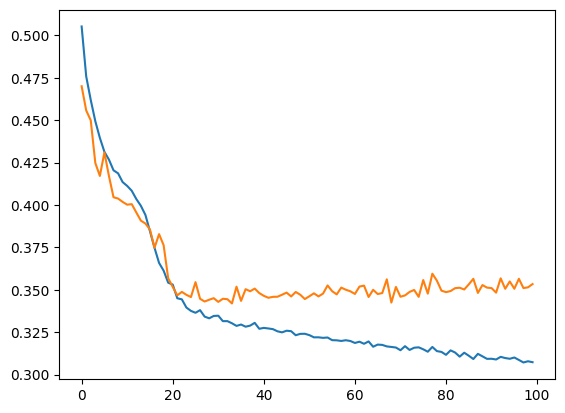

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

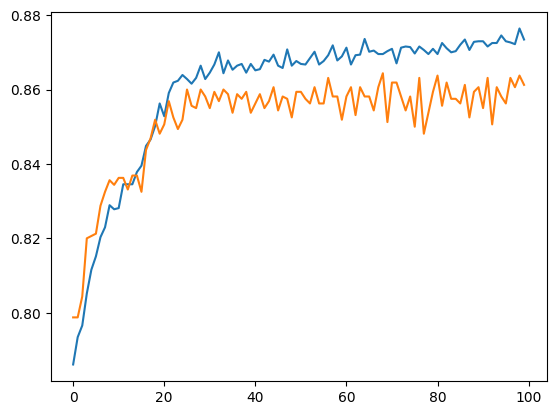

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])